# Simple Genetic Algorithm for the 1-0 Knapsack problem

Genetic algorithm (GA) finds a solution using a stochastic selection of subsets and evolution process. The crossover process <br/> produces new generations. The mutation replaces a part of variable with a random element and further evaluation finds a  <br/> 
current best subset. 

### Imports

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Maximum weight for the knapsack
MAX_WEIGHT = 1500

In [13]:
df = pd.read_csv('knapsack.csv') # data is the random combination of integers
df.head(7)

,Item_id,item_weights,item_values
0,1,21,96
1,2,12,99
2,3,30,52
3,4,24,100
4,5,45,46
5,6,47,43
6,7,41,22


## Functions

In [7]:
# initialise the random selection of items (either 1 or 0 )
def initialise_pops():
    config = [random.randint(0, 1) for _ in range(100)]
    return config


# objective function: find better combination with the higher value between two
def compare_fitness(one, two):
    score_one = score_fitness(one)
    score_two = score_fitness(two)
    return one if score_one > score_two else two


# fitness evaluation
def score_fitness(config:list):
    weight_sum = 0
    values_sum = 0
    i = 0
   
    while weight_sum < MAX_WEIGHT and i < 100:
        if config[i] == 1:
            weight_sum += df.iloc[i].item_weights
            values_sum += df.iloc[i].item_values
        i += 1
    
    return values_sum


# crossover operation
def crossover(a:list, b:list):
    cpoint = int(len(a)/2)
    p1 = a[:]
    p2 = b[:]
    crossed1 = p1[:cpoint] + p2[cpoint:]
    crossed2 = p1[cpoint:] + p2[:cpoint]
    return crossed1, crossed2


# mutation opeation
def mutate(a):
    mutated = a[:]
    i = random.randint(0, len(mutated) - 1)
    mutated[i] = 0
    return mutated

### Genetic algorithm

In [8]:
# main function to generate solutions
def genetic_algorithm_kanpsack(init_pop = 16, mutation=True):
    pops =[initialise_pops() for p in range(init_pop)]
    
    best_score = 0
    best_pop = []
    for i in range(init_pop - 3):
        #first gen
        first_gen_one = compare_fitness(pops[i], pops[i+1])
        first_gen_two = compare_fitness(pops[i+2], pops[i+3])
        
        second_one, second_two = crossover(first_gen_one, first_gen_two)
        
        current_best = compare_fitness(second_one, second_two)
        current_best_score = score_fitness(current_best)
        if mutation:
            current_best = mutate(current_best)
            current_best_score = score_fitness(current_best)
        
        if current_best_score > best_score:
            best_score = current_best_score
            best_pops = current_best
            
    return best_score
        

## Visualise the outputs

In [46]:
# find the potential solutions and plot them
def display_knapsack_values(iters=30):
    results= []
    for i in range(iters):
        results.append(genetic_algorithm_kanpsack())

    # Make the data for plots
    plot_data = pd.DataFrame({'knapsack values': results, 
                              'iterations': np.arange(1,iters+1,1, dtype=int)},
                            index=range(iters))

    print(plot_data)
    mean_val = np.mean(plot_data['knapsack values'])
    median_val = np.median(plot_data['knapsack values'])
    max_val = np.max(plot_data['knapsack values'])
    print('**********************************')
    print(f'Average Value:{round(mean_val, 2)}')
    print(f'Median Value:{median_val:.2f}')
    print(f'Maximum Value:{max_val:.2f}')
    print()
    #styling
    plt.figure(figsize=(10, 7), dpi=170)
    plt.style.use('ggplot')
    plt.title('Knapsack Values', fontsize=17)
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Values', fontsize=14)

    plt.xlim([0,iters])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    

    #display
    plt.plot( plot_data['iterations'], 
             plot_data['knapsack values'], 
             color='#0099cc', 
             linewidth=3)
    plt.show()


    knapsack values  iterations
0              3152           1
1              3245           2
2              3180           3
3              3098           4
4              3330           5
5              2989           6
6              3264           7
7              3155           8
8              3042           9
9              3033          10
10             3081          11
11             3114          12
12             2892          13
13             3104          14
14             3126          15
15             3172          16
16             3099          17
17             3181          18
18             3094          19
19             3080          20
20             3165          21
21             3330          22
22             3206          23
23             3268          24
24             3275          25
25             3283          26
26             3134          27
27             3122          28
28             3275          29
29             2896          30
30      

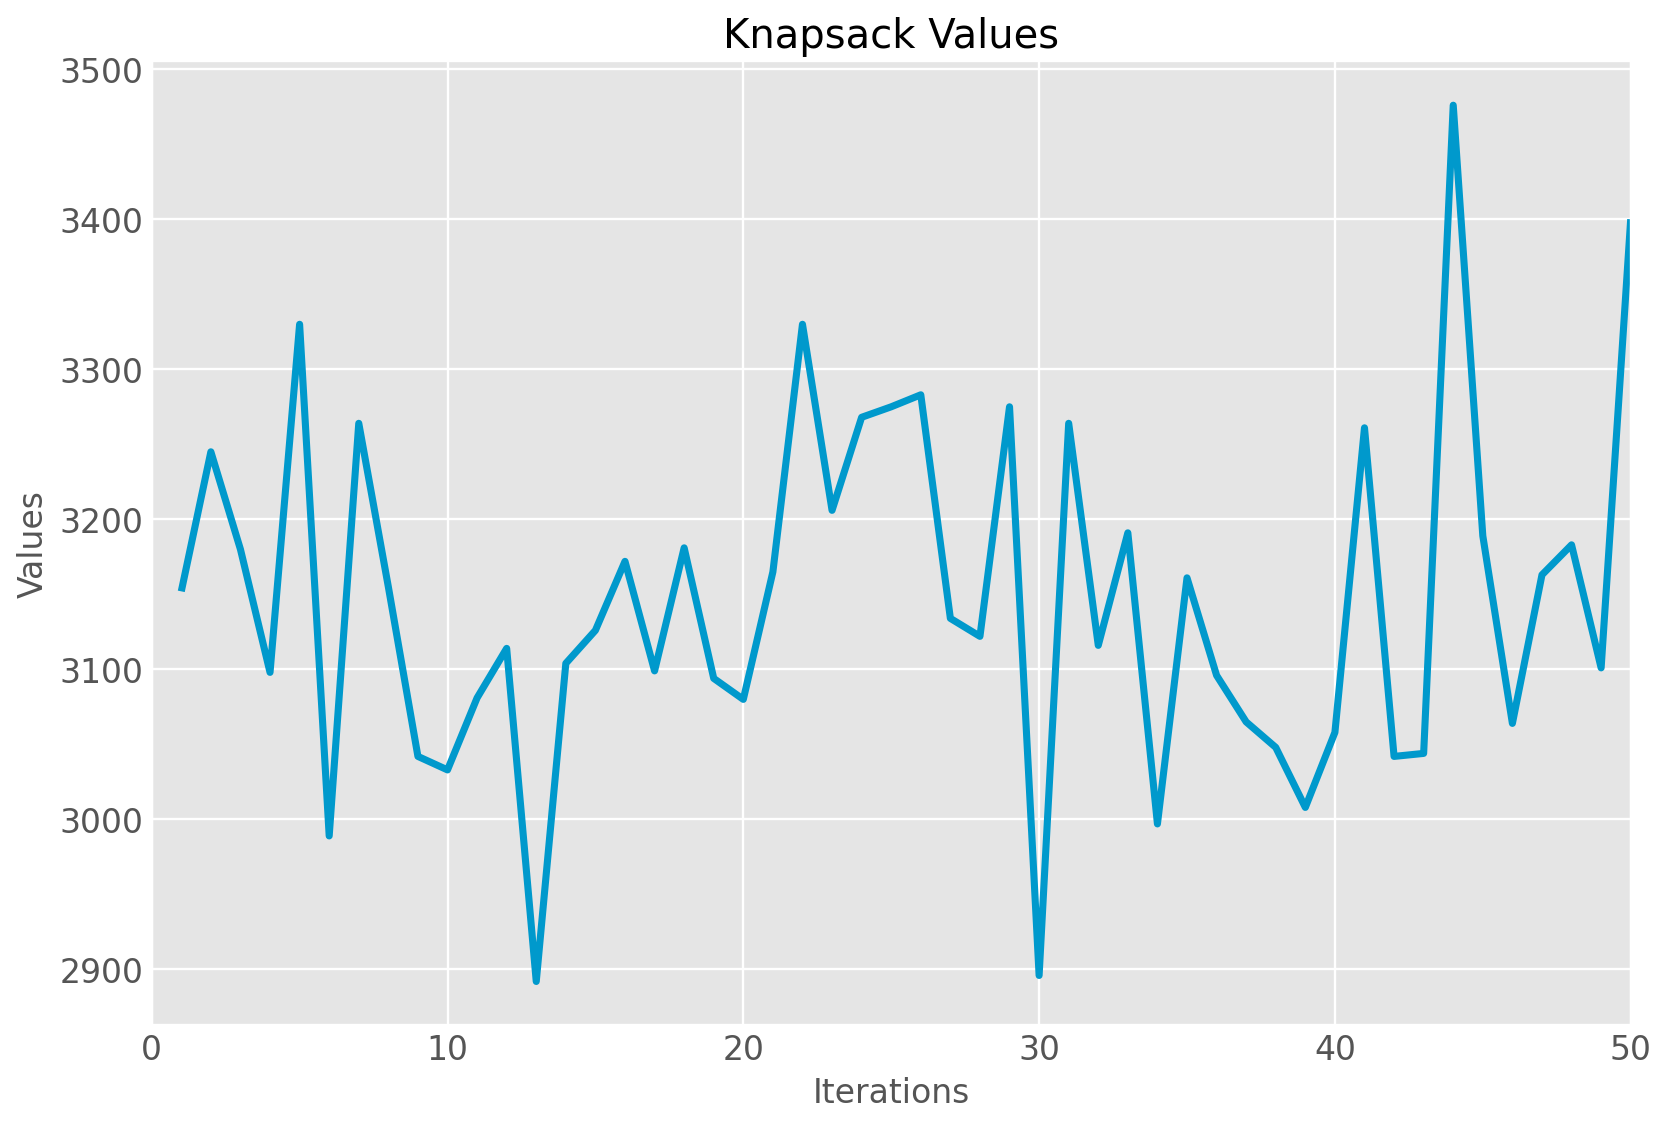

In [50]:
display_knapsack_values(iters=50)

#### The current best value from the 50 iterations appears to be 3476.